In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import scipy.stats as spicystats
import sys
sys.path.insert(0, 'src/')
import functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%load_ext autoreload
%autoreload 2

In [2]:
## data cleaning
df = pd.read_csv('../data/lending_club_loan_dataset.csv')
df.drop('last_major_derog_none', axis=1, inplace=True)
df.drop('grade', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)
df.dropna(inplace=True)
df.replace({' 36 months': '36 months', ' 36 Months': '36 months', ' 60 months': '60 months'}, inplace=True)
df['revol_util'].sort_values(ascending=False).head(5)
df = df[df['revol_util'] <= 200]

In [3]:
## hypothesis test: no prior delinquencies decreases the default rate

# H-null: p_default_given_none >= p_default_given prior 
# H-alt: p_default_given_none < p_default_given_prior
# significance level: alpha = 0.05


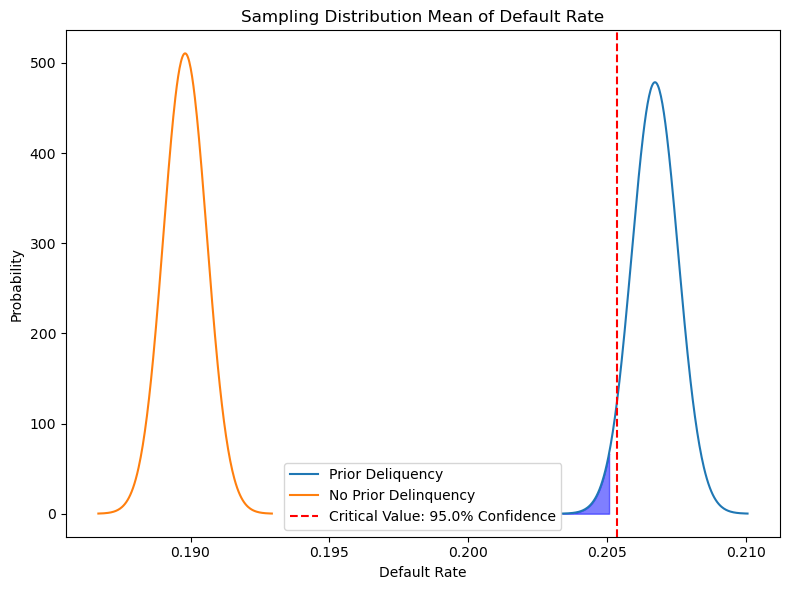

In [4]:
functions.sampling_distrbution_hypothesis_test( df['bad_loan'][df['last_delinq_none'] == 1], \
                                                df['bad_loan'][df['last_delinq_none'] == 0], \
                                                alpha=0.05, \
                                                dist_labels=['Prior Deliquency', 'No Prior Delinquency'])

In [5]:
## hypothesis test: shorter loan term decreases the default rate

# H-null: p_default_given 36 month >= p_default_given 60 month
# H-alt: p_default_given 36 month < p_default_given 60 month
# significance level: alpha = 0.05

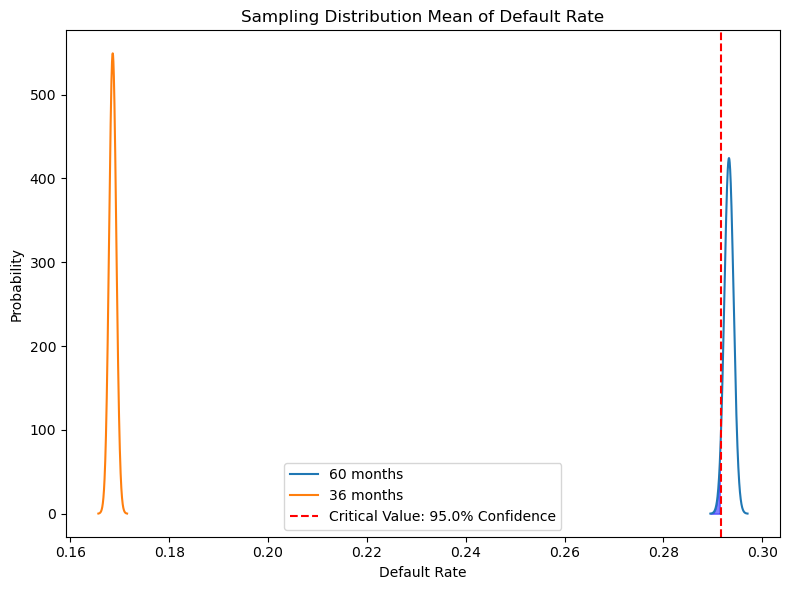

In [6]:
functions.sampling_distrbution_hypothesis_test( df['bad_loan'][df['term'] == '60 months'], \
                                                df['bad_loan'][df['term'] == '36 months'], \
                                                alpha=0.05, \
                                                dist_labels=['60 months', '36 months'])

In [7]:
## hypothesis test: home ownership decreases the default rate

# H-null: p_default_given own/mortgage home >= p_default_given rent home
# H-alt: p_default_given own/mortgage home < p_default_given rent home
# significance level: alpha = 0.05

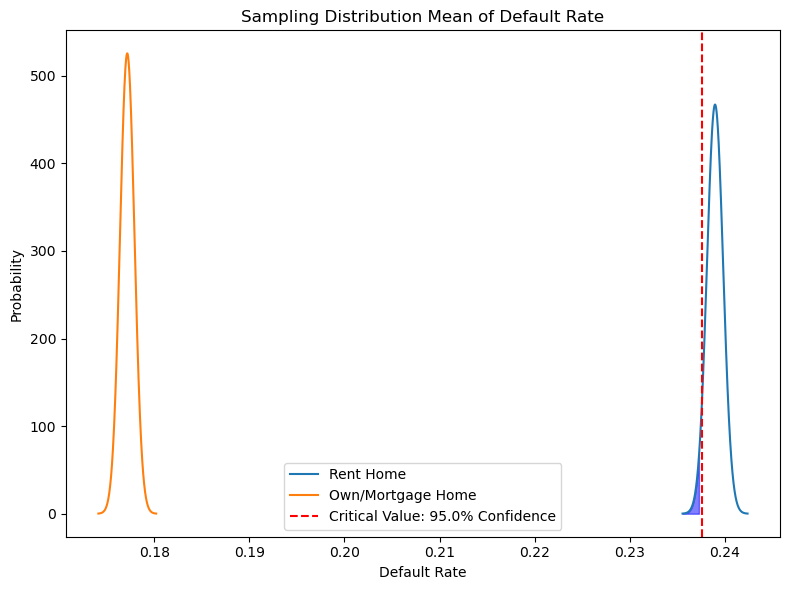

In [8]:
functions.sampling_distrbution_hypothesis_test( df['bad_loan'][df['home_ownership'] == 'RENT'], \
                                                df['bad_loan'][df['home_ownership'] != 'RENT'], \
                                                alpha=0.05, \
                                                dist_labels=['Rent Home', 'Own/Mortgage Home'])